In [17]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
path = Path("loan_approval_dataset.csv")

df = pd.read_csv(path)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [19]:
df = df.rename(columns={'loan_id' : 'ID', ' no_of_dependents' : '# of Dependants', ' education' : 'Education',' self_employed' : 'Self Employed', ' income_annum' : 'Income', ' loan_amount' : 'Loan Amount', ' loan_term' : 'Loan Term', ' cibil_score' : 'Cibil Score', ' residential_assets_value' : 'Residential Assets', ' commercial_assets_value' : 'Commerical Value', ' luxury_assets_value' : 'Luxury Assets', ' bank_asset_value' : 'Bank Assets', ' loan_status' : 'Loan Status'})

In [20]:
df.head()

,ID,# of Dependants,Education,Self Employed,Income,Loan Amount,Loan Term,Cibil Score,Residential Assets,Commerical Value,Luxury Assets,Bank Assets,Loan Status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [21]:
# Assuming your DataFrame is named df
print(df.columns)


Index(['ID', '# of Dependants', 'Education', 'Self Employed', 'Income',
       'Loan Amount', 'Loan Term', 'Cibil Score', 'Residential Assets',
       'Commerical Value', 'Luxury Assets', 'Bank Assets', 'Loan Status'],
      dtype='object')


In [22]:
# df['Education'] = df['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})

df = pd.get_dummies(df, columns=['Education','Self Employed', 'Loan Status'], drop_first=True)


df.head()


,ID,# of Dependants,Income,Loan Amount,Loan Term,Cibil Score,Residential Assets,Commerical Value,Luxury Assets,Bank Assets,Education_ Not Graduate,Self Employed_ Yes,Loan Status_ Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,False,False,False
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,True,True,True
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,False,False,True
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,False,False,True
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,True,True,True


In [23]:
df = df.rename(columns= {'Education_ Not Graduate' : 'Graduated', 'Self Employed_ Yes' : 'Self Employed', 'Loan Status_ Rejected' : 'Loan Status'})

In [24]:
df.head()

,ID,# of Dependants,Income,Loan Amount,Loan Term,Cibil Score,Residential Assets,Commerical Value,Luxury Assets,Bank Assets,Graduated,Self Employed,Loan Status
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,False,False,False
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,True,True,True
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,False,False,True
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,False,False,True
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,True,True,True


In [25]:
df.drop(columns= 'ID')

,# of Dependants,Income,Loan Amount,Loan Term,Cibil Score,Residential Assets,Commerical Value,Luxury Assets,Bank Assets,Graduated,Self Employed,Loan Status
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,False,False,False
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,True,True,True
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,False,False,True
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,False,False,True
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,False,True,True
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,True,True,False
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,True,False,True
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,True,False,False


In [26]:
X = df.drop('Loan Status', axis=1)  # Features
y = df['Loan Status']  # Target variable

In [27]:
X = df.drop('Loan Status', axis=1)  # Features

y = df['Loan Status']  # Target variable

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Create scaler instance

X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler

X_scaler.fit(X_train)

# Scale the data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
model = LogisticRegression()

# Train the model on the training set

model.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = model.predict(X_test)

# Evaluate accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display confusion matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Accuracy: 0.64
Confusion Matrix:
[[510  26]
 [284  34]]


C:\Users\Joseph Haas\AppData\Local\Temp\ipykernel_11196\953913291.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['Rejected', 'Approved'])
C:\Users\Joseph Haas\AppData\Local\Temp\ipykernel_11196\953913291.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['Rejected', 'Approved'])


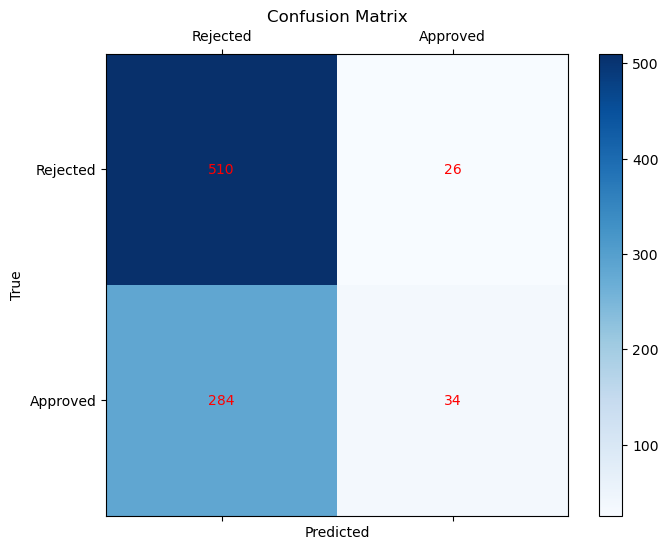

In [32]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + ['Rejected', 'Approved'])
ax.set_yticklabels([''] + ['Rejected', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.grid(False)
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='red')
plt.show()

In [33]:
# ROC Curve
y_pred_proba = model_lr.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


NameError: name 'model_lr' is not defined

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()